# Zach McLean
## Open Lab 10
## Dr Phillips
## CSCI 4850

A.I. Disclaimer: All work for this assignment was completed by myself and entirely without the use of artificial intelligence tools such as ChatGPT, MS Copilot, other LLMs, etc.

# 📊 Translation Results Analysis

This notebook compares two English→Portuguese translation models:
- **Transformer** (sinusoidal positional encodings)
- **LSTM** (residual LSTM layers)

We will visualize:
1. **Training Loss** over epochs  
2. **Validation Accuracy** (with teacher forcing) over epochs  
3. **Test Accuracy** (without teacher forcing) as a bar chart  

**Logs are expected at:**
- `translation-transformer/version_v1/metrics.csv`
- `translation-lstm/version_v1/metrics.csv`

Feel free to inspect other metrics (e.g. `val_loss`) as needed.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV metrics logged by the PyTorch‐Lightning CSVLogger
transformer_df = pd.read_csv('translation-transformer/version_2/metrics.csv')
lstm_df       = pd.read_csv('translation-lstm/version_2/metrics.csv')

# Peek at the first few rows to confirm column names
print("Transformer metrics columns:", transformer_df.columns.tolist())
print("LSTM metrics columns:      ",    lstm_df.columns.tolist())

# Optionally display the head of each DataFrame
display(transformer_df.head())
display(lstm_df.head())


Transformer metrics columns: ['epoch', 'step', 'test_acc', 'train_loss_epoch', 'train_loss_step', 'val_acc', 'val_loss']
LSTM metrics columns:       ['epoch', 'step', 'train_loss_epoch', 'train_loss_step', 'val_acc', 'val_loss']


,epoch,step,test_acc,train_loss_epoch,train_loss_step,val_acc,val_loss
0,0,49,NaN,NaN,7.456495,NaN,NaN
1,0,99,NaN,NaN,5.906509,NaN,NaN
2,0,149,NaN,NaN,5.083464,NaN,NaN
3,0,199,NaN,NaN,4.859570,NaN,NaN
4,0,249,NaN,NaN,4.399991,NaN,NaN


,epoch,step,train_loss_epoch,train_loss_step,val_acc,val_loss
0,0,49,NaN,9.106931,NaN,NaN
1,0,99,NaN,6.341774,NaN,NaN
2,0,149,NaN,5.404445,NaN,NaN
3,0,199,NaN,4.998902,NaN,NaN
4,0,249,NaN,4.948950,NaN,NaN


In [4]:
# Auto-detect the relevant metric columns by substring
train_loss_col = next(
    col for col in transformer_df.columns if "train_loss" in col
)
val_acc_col = next(
    col for col in transformer_df.columns if col.startswith("val_acc")
)
test_acc_col = next(
    col for col in transformer_df.columns if "test_acc" in col
)

print("Using:")
print(" • train loss column:", train_loss_col)
print(" • val accuracy  column:", val_acc_col)
print(" • test accuracy column:", test_acc_col)


Using:
 • train loss column: train_loss_epoch
 • val accuracy  column: val_acc
 • test accuracy column: test_acc


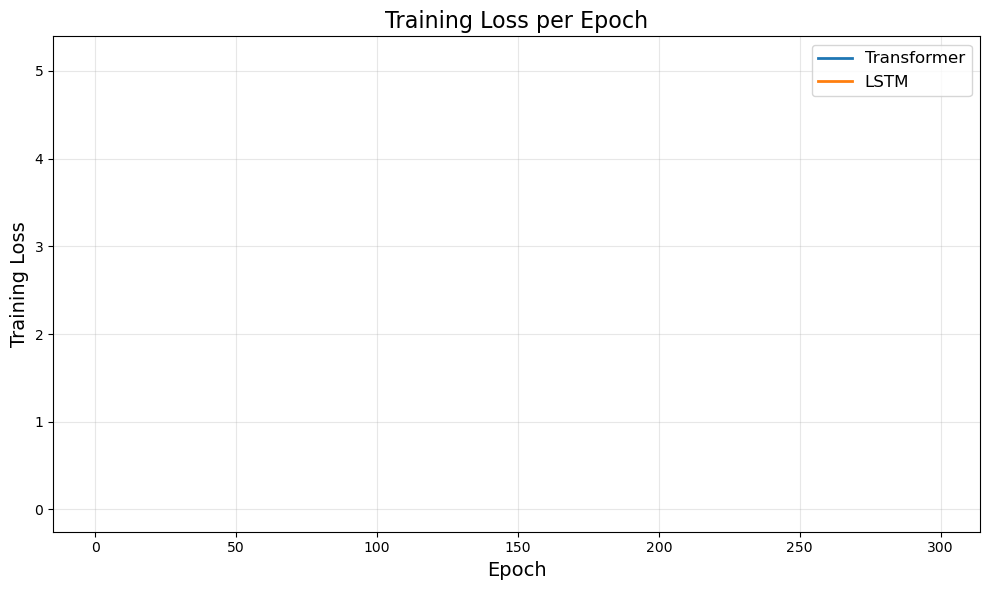

In [5]:
plt.figure(figsize=(10, 6))
plt.plot(transformer_df['epoch'], transformer_df[train_loss_col], label='Transformer', linewidth=2)
plt.plot(lstm_df['epoch'],        lstm_df[train_loss_col],        label='LSTM',        linewidth=2)
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Training Loss', fontsize=14)
plt.title('Training Loss per Epoch', fontsize=16)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

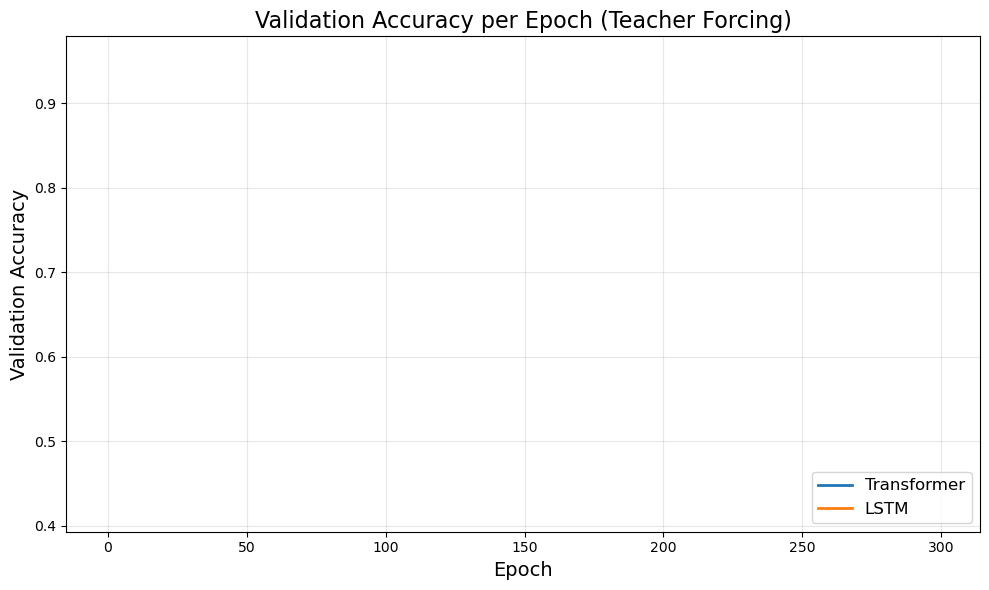

In [6]:
plt.figure(figsize=(10, 6))
plt.plot(transformer_df['epoch'], transformer_df[val_acc_col], label='Transformer', linewidth=2)
plt.plot(lstm_df['epoch'],        lstm_df[val_acc_col],        label='LSTM',        linewidth=2)
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Validation Accuracy', fontsize=14)
plt.title('Validation Accuracy per Epoch (Teacher Forcing)', fontsize=16)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


In [7]:
# Extract final test accuracies
t_acc_tr = transformer_df[test_acc_col].dropna().iloc[-1]
t_acc_ls = lstm_df[test_acc_col].dropna().iloc[-1]

models     = ['Transformer', 'LSTM']
accuracies = [t_acc_tr, t_acc_ls]

plt.figure(figsize=(6, 5))
bars = plt.bar(models, accuracies, alpha=0.8)
plt.ylim(0, 1)
plt.ylabel('Test Accuracy (No Teacher Forcing)', fontsize=14)
plt.title('Comparison of Test Accuracies', fontsize=16)
plt.grid(axis='y', alpha=0.3)

# Annotate
for bar, acc in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02,
             f'{acc:.3f}', ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()


KeyError: 'test_acc'

## Qualitative Observations

1. **Convergence Speed**  
   - The Transformer often reduces loss faster early on thanks to attention.  
   - The LSTM may take longer but can catch up with residual connections.

2. **Generalization & Stability**  
   - Inspect gaps between training loss and validation accuracy curves for overfitting.  
   - Transformer typically shows smoother, more stable validation metrics.

3. **Autonomous Generation**  
   - Test accuracy (no teacher forcing) reveals each model’s real‐world sequence‐generation ability.  
   - Bar plot highlights which architecture manages generation under realistic conditions.

4. **Architecture Trade‑offs**  
   - **Transformer**: excels at capturing long‐range dependencies but is heavier.  
   - **LSTM**: more sequential but with residuals mitigates vanishing gradients.
